# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [23]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [24]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [25]:
# YOUR CODE HERE
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [26]:
# YOUR CODE HERE
df.shape

(32561, 15)

In [27]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [28]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [29]:
df.isnull().sum()

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

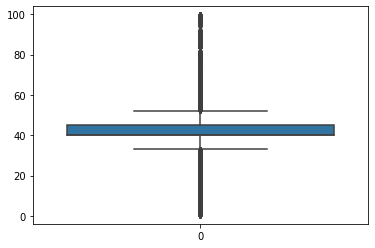

In [30]:
sns.boxplot(data=df['hours-per-week'])
plt.show()

Analysis: This box plot represents the "hours-per-week" variable. The plot displays the median, which is the middle value, in the dataset. The datapoints beyond this point are all the potential outliers that lie significantly far from the general area of the data.

In [31]:
df['hours-per-week'] = winsorize(df['hours-per-week'], limits=[0.05, 0.05])

In [32]:
column1 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
df = pd.get_dummies(df, columns=column1, drop_first=True)

In [33]:
class_counts = df['hours-per-week'].value_counts()
class_counts

40.0    15062
60.0     2890
50.0     2796
45.0     1807
18.0     1672
35.0     1287
20.0     1207
30.0     1134
55.0      686
25.0      666
48.0      513
38.0      472
32.0      264
24.0      250
36.0      217
42.0      216
44.0      207
43.0      149
37.0      148
52.0      138
56.0       97
28.0       86
46.0       82
47.0       48
22.0       44
54.0       40
33.0       39
39.0       38
41.0       34
27.0       30
49.0       29
26.0       28
34.0       28
58.0       27
21.0       24
53.0       24
23.0       21
57.0       17
19.0       14
51.0       13
29.0        7
31.0        5
59.0        5
Name: hours-per-week, dtype: int64

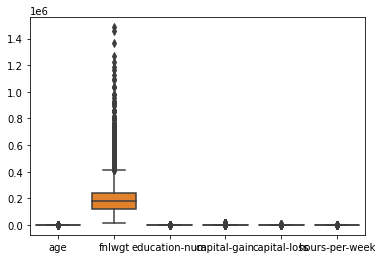

In [34]:
column2 = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
sns.boxplot(data=df[column2])
plt.show()

Analysis: The "fnlwgt" variable, final weight, in the dataset represents the sampling weight assigned to each individual in the data. The data and its sampling design is the reason why the final weight category has many outliers.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

Introduces and prepares the data for modeling. The dataset is split into features (X) and target variable (y). We want to predict the "income_binary" variable.

In [35]:
# Feature and label
X = df.drop('income_binary', axis=1)
y = df['income_binary']

In [36]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
5514,33.0,198183,13,0,0,50.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19777,36.0,86459,11,0,1887,50.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10781,58.0,203039,5,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32240,21.0,180190,11,0,0,46.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9876,27.0,279872,10,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# Model fitting
scaler = StandardScaler()
scaler.fit(X_train)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/codio/.local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  downcast=downcast,


A Logistic Regression model is instantiated and fitted to the scaled training data. Scaling is performed to ensure that the features with different scales do not disproportinately influence the model resulting in skewed results.

In [64]:
# Model fitting
model_default = LogisticRegression()
model_default.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The model is used to predict the target variable for test set (X_test_scaled) and the accuracy of the predictions is calculated using the true label (y_test). Accuracy is used to measure the proportion of correctly predicted instances among all instances in the data set.

In [69]:
# Calculating Accuracy
y_pred = model_default.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8585905112851221


A grid search is performed to find the best hyperparameter for the Logistic Regression model. Hyperparameters are the parameters that are set before training a model so their values cannot impact the model's performance. This search systematically tests different values of the hyperparameter 'C' and selects that value in order to get the best performance.

In [63]:
# Model improvement
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
best_c = grid_search.best_params_['C']
best_c

0.001

The model with the best hyperparameter value is evaluated using the the scaled test data. The accuracy of this model is calculated and compared to the accuracy of the original model.

In [67]:
# Best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Model Accuracy: 0.5978811607554122


The overall purpose of using these specific techniques is to build a machine learning model that can accurately predict the target variable (income_binary) based on the features in the dataset. By performing these steps with these techniques, we are easily able to compare the accuracy scores of the two different models. The ultimate goal is to build a model that generalizes to new data and can make accurate predictions on real-world instances.